### Dieses Notebook zeigt ein einfaches Beispiel für ein flaches neuronales Netz zum Trainieren des MNIST-Datensatzes.

Laden der nötigen Bibliotheken:

In [45]:
import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from keras.optimizers import SGD, RMSprop, Adam 
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import ssl
ssl._create_default_https_context = ssl._create_unverified_context 
from sklearn.model_selection import train_test_split

Laden und Aufbereiten der Trainingsdaten:

In [46]:
def read_card_images(folder_path):
    x_data = []
    y_data = []

    # Get the list of files in the folder
    file_list = os.listdir(folder_path)

    for file_name in file_list:
        # Read the image file
        image_path = os.path.join(folder_path, file_name)
        image = cv2.imread(image_path)

        # Preprocess the image (resize, normalize, etc.) if necessary
        # ...

        # Extract the color information from the image file name
        color = file_name.split('_')[1]  # Assuming the file name format is "color_card.jpg"

        # Convert the color label to a numerical representation (e.g., red=0, green=1, blue=2)
        if color == 'r':
            label = 0
        elif color == 'g':
            label = 1
        elif color == 'b':
            label = 2

        # Append the image and label to the data arrays
        x_data.append(image)
        y_data.append(label)

    # Convert the data arrays to NumPy arrays
    x_data = np.array(x_data)
    y_data = np.array(y_data)

    return x_data, y_data

In [47]:
x_data, y_data = read_card_images('cards/')
print(x_data)
print(y_data)

[[[[196 174 156]
   [197 175 157]
   [198 176 158]
   ...
   [203 183 165]
   [203 184 163]
   [203 184 163]]

  [[196 174 156]
   [197 175 157]
   [198 176 158]
   ...
   [202 182 164]
   [203 184 163]
   [203 184 163]]

  [[197 175 157]
   [197 175 157]
   [198 176 158]
   ...
   [202 182 164]
   [203 184 163]
   [204 185 164]]

  ...

  [[199 180 165]
   [199 180 165]
   [199 180 165]
   ...
   [208 187 172]
   [209 188 173]
   [210 189 174]]

  [[199 180 165]
   [199 180 165]
   [199 180 165]
   ...
   [208 187 172]
   [209 188 173]
   [210 189 174]]

  [[199 180 165]
   [199 180 165]
   [199 180 165]
   ...
   [208 187 172]
   [209 188 173]
   [210 189 174]]]


 [[[171 179 162]
   [171 179 162]
   [171 179 162]
   ...
   [188 196 179]
   [189 197 180]
   [190 198 181]]

  [[171 179 162]
   [171 179 162]
   [171 179 162]
   ...
   [189 197 180]
   [189 197 180]
   [190 198 181]]

  [[170 178 161]
   [171 179 162]
   [171 179 162]
   ...
   [188 196 179]
   [188 196 179]
   [188 196

In [48]:
def split_data(x_data, y_data, test_size=0.1, random_state=None):
    # Split the data into training and test sets
    x_train, x_test, y_train, y_test = train_test_split(
        x_data, y_data, test_size=test_size, random_state=random_state)
    y_train = keras.utils.to_categorical(y_train, 3)
    y_test = keras.utils.to_categorical(y_test, 3)
    return x_train, x_test, y_train, y_test


In [49]:
x_train, x_test, y_train, y_test = split_data(x_data, y_data, test_size=0.1, random_state=42)


In [50]:
# Define the model
model = Sequential([
    Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(500, 300, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(16, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(50, activation='relu'),
    Dense(3, activation='softmax')
])

Ausgabe der Netzstruktur:

In [51]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 498, 298, 16)      448       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 249, 149, 16)     0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 247, 147, 16)      2320      
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 123, 73, 16)      0         
 2D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 143664)            0         
                                                                 
 dense_8 (Dense)             (None, 50)               

Erstellen des Netzes mit Optimierungsmethode (z.B. SGD, RMSprop oder Adam):

In [52]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

Trainineren des Netzes:

In [53]:
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_data=(x_test, y_test))

Epoch 1/10
8/8 [==============================] - 9s 1s/step - loss: 6391.7500 - accuracy: 0.3306 - val_loss: 1189.6232 - val_accuracy: 0.5556
Epoch 2/10
8/8 [==============================] - 8s 991ms/step - loss: 710.0183 - accuracy: 0.3926 - val_loss: 36.2014 - val_accuracy: 0.7778
Epoch 3/10
8/8 [==============================] - 7s 926ms/step - loss: 58.9167 - accuracy: 0.6198 - val_loss: 4.9673 - val_accuracy: 0.8519
Epoch 4/10
8/8 [==============================] - 8s 935ms/step - loss: 10.4387 - accuracy: 0.8099 - val_loss: 3.2245 - val_accuracy: 0.7778
Epoch 5/10
8/8 [==============================] - 8s 1s/step - loss: 3.1518 - accuracy: 0.8719 - val_loss: 0.2829 - val_accuracy: 0.9630
Epoch 6/10
8/8 [==============================] - 8s 965ms/step - loss: 1.0550 - accuracy: 0.9628 - val_loss: 0.2639 - val_accuracy: 0.9259
Epoch 7/10
8/8 [==============================] - 8s 964ms/step - loss: 0.2072 - accuracy: 0.9835 - val_loss: 0.2415 - val_accuracy: 0.9630
Epoch 8/10
8/8 

Berechnen und Bewerten der Netzausgabe nach dem Training:

In [54]:
score = model.evaluate(x_test, y_test, verbose=0)
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])


Test loss: 0.0008916766382753849
Test accuracy: 1.0


Ausgabe des Netzfehlers während des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

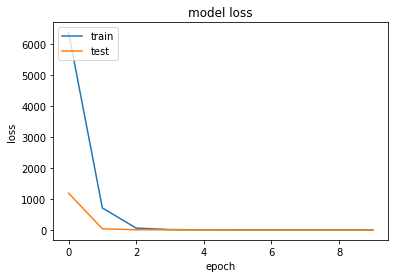

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Ausgabe der Netz-Accuracy waehrend des Trainingsverlaufes (fuer Trainingsdaten und Testdaten):

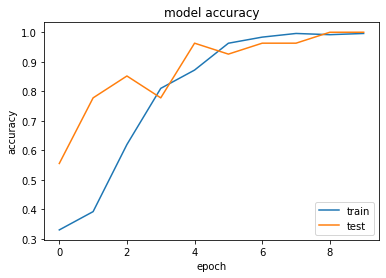

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

Ausgabe der falsch klassifizierten Testdaten-Bilder:

In [57]:
pred = model.predict(x_test)
mask = ~(np.argmax(pred,axis=1)==np.argmax(y_test,axis=1))
wrong_pred=pred[mask,:]
wrong_label=np.argmax(wrong_pred,axis=1)
wrong_y=y_test[mask,:]
wrong_x=x_test[mask,:,:]
print(wrong_pred.shape[0],'out of',pred.shape[0],'false classifications in test dataset (',int(wrong_pred.shape[0]/pred.shape[0]*10000)/100,'% )')

for i in range(wrong_y.shape[0]):
    plt.imshow(1-wrong_x[i,:,:],cmap='gray')
    plt.title(str(np.argmax(wrong_y[i,:]))+' detected as '+str(wrong_label[i]))
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 278ms/step
0 out of 27 false classifications in test dataset ( 0.0 % )
